In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ai-projects/forecast-studio

/content/drive/MyDrive/ai-projects/forecast-studio


In [4]:
import pandas as pd

test_path = "data/processed/test_features.parquet"
train_path = "data/processed/test_features.parquet"

test_df = pd.read_parquet(test_path)
train_df = pd.read_parquet(train_path)

test_df.head()

,date,series_id,store,item,sales,dow,is_weekend,weekofyear,lag_1,lag_7,lag_28,roll_mean_7,roll_mean_28,roll_std_7,roll_std_28
0,2017-01-01,10_1,10,1,25,6,1,52,28.0,30.0,23.0,22.142857,20.964286,5.047394,5.301866
1,2017-01-02,10_1,10,1,11,0,0,1,25.0,21.0,17.0,20.714286,20.750000,6.600866,5.581882
2,2017-01-03,10_1,10,1,16,1,0,1,11.0,17.0,21.0,20.571429,20.571429,6.704654,5.653112
3,2017-01-04,10_1,10,1,17,2,0,1,16.0,14.0,23.0,21.000000,20.357143,6.298148,5.671333
4,2017-01-05,10_1,10,1,28,3,0,1,17.0,25.0,19.0,21.428571,20.678571,6.704654,5.843981


In [6]:
import joblib

model_path = "models/baseline_lightgbm.pkl"
model = joblib.load(model_path)

In [8]:
TARGET_COL = "sales"
SERIES_COL = "series_id"
DATE_COL = "date"

exclude = [TARGET_COL, SERIES_COL, DATE_COL]
X_test = test_df.drop(columns=exclude)
y_test = test_df[TARGET_COL]

y_pred = model.predict(X_test)

In [9]:
results = test_df[[SERIES_COL, DATE_COL, TARGET_COL]].copy()
results["pred"] = y_pred
results.head()

,series_id,date,sales,pred
0,10_1,2017-01-01,25,25.087890
1,10_1,2017-01-02,11,14.980015
2,10_1,2017-01-03,16,18.960242
3,10_1,2017-01-04,17,19.468528
4,10_1,2017-01-05,28,21.677172


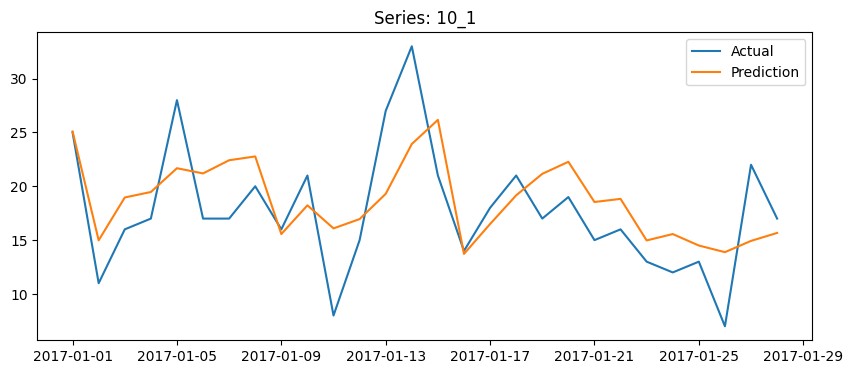

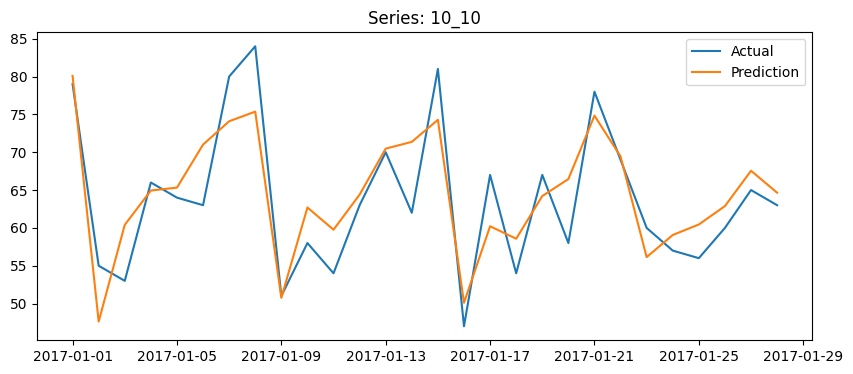

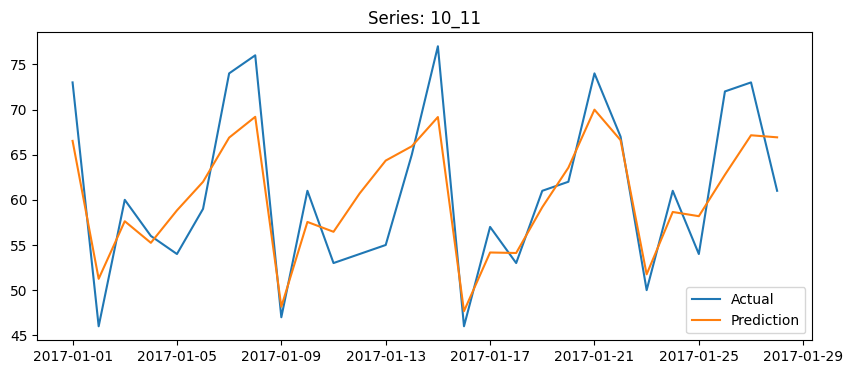

In [10]:
import matplotlib.pyplot as plt

sample_series = results[SERIES_COL].unique()[:3]

for s in sample_series:
  subset = results[results[SERIES_COL] == s]

  plt.figure(figsize=(10, 4))
  plt.plot(subset[DATE_COL], subset[TARGET_COL], label="Actual")
  plt.plot(subset[DATE_COL], subset["pred"], label="Prediction")
  plt.title(f"Series: {s}")
  plt.legend()
  plt.show()